<a href="https://colab.research.google.com/github/lucianorebollo/proyecto_integrado_2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: armar un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Lista de materias de nivel secundario en Argentina
materias = ['Matemática', 'Lengua y Literatura', 'Historia', 'Geografía', 'Ciencias Naturales', 'Biología', 'Física', 'Química', 'Educación Física', 'Inglés', 'Ciudadanía', 'Arte', 'Música', 'Informática']

# Función para generar un nombre aleatorio
def generar_nombre():
  nombres = ['Juan', 'Pedro', 'Maria', 'Ana', 'Jose', 'Laura', 'Carlos', 'Sofia', 'Diego', 'Martina']
  apellidos = ['Gomez', 'Perez', 'Rodriguez', 'Gonzalez', 'Lopez', 'Martinez', 'Sanchez', 'Romero', 'Fernandez', 'Torres']
  return f"{random.choice(nombres)} {random.choice(apellidos)}"

# Generar datos aleatorios para 100 alumnos
num_filas = 100
data = []
for _ in range(num_filas):
  alumno = generar_nombre()
  dni = random.randint(10000000, 99999999)  # DNI aleatorio (ajustar rango si es necesario)
  for materia in materias:
      nota1 = random.randint(1, 10)
      nota2 = random.randint(1, 10)
      nota3 = random.randint(1, 10)
      faltas = random.randint(0, 20)
      data.append([alumno, dni, materia, nota1, nota2, nota3, faltas])

# Crear el DataFrame
columnas = ['Alumno', 'DNI', 'Materia', 'Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre', 'Faltas a clases']
df = pd.DataFrame(data, columns=columnas)

# Mostrar las primeras filas del DataFrame
print(df.head())

# Guardar el DataFrame en un archivo CSV (opcional)
# df.to_csv('datos_escolares.csv', index=False)

         Alumno       DNI              Materia  Nota 1er Trimestre  \
0  Diego Torres  38076452           Matemática                  10   
1  Diego Torres  38076452  Lengua y Literatura                   8   
2  Diego Torres  38076452             Historia                   9   
3  Diego Torres  38076452            Geografía                   7   
4  Diego Torres  38076452   Ciencias Naturales                   5   

   Nota 2do Trimestre  Nota 3er Trimestre  Faltas a clases  
0                   4                   7               17  
1                   6                   5               20  
2                   5                   5               10  
3                  10                   3                9  
4                   8                   6                0  


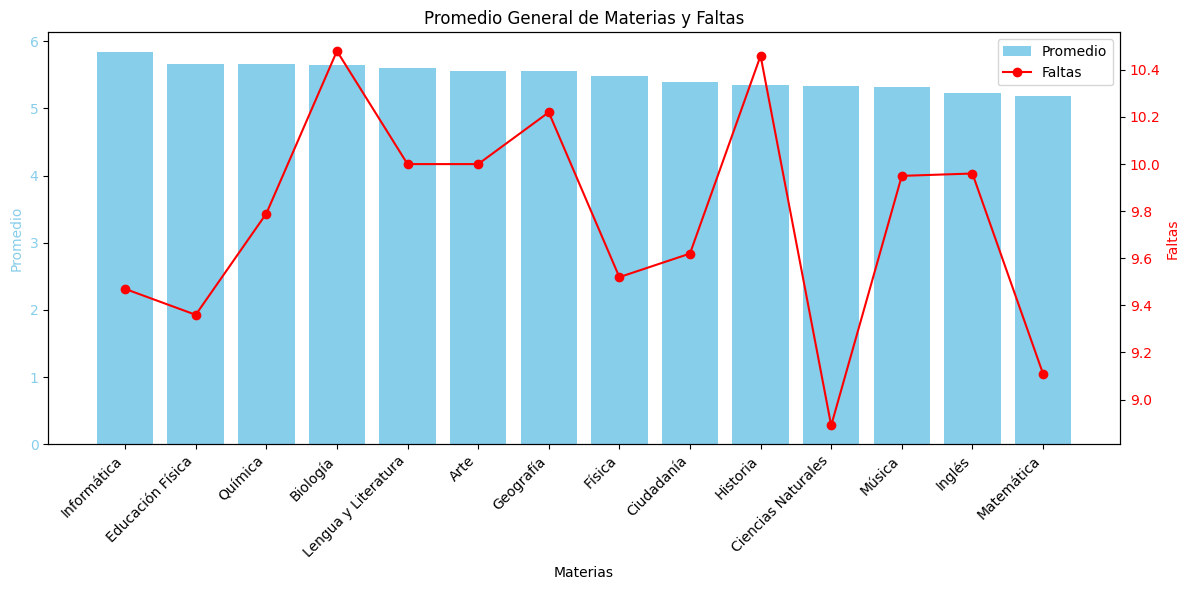

In [2]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor contrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import pandas as pd
import matplotlib.pyplot as plt

# ... (código anterior) ...

# Calcular el promedio de cada materia
promedios_materias = df.groupby('Materia').agg(
    Promedio=('Nota 1er Trimestre', 'mean'),
    Faltas=('Faltas a clases', 'mean')
).sort_values('Promedio', ascending=False)

# Crear el gráfico de barras
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de barras para los promedios
ax1.bar(promedios_materias.index, promedios_materias['Promedio'], color='skyblue', label='Promedio')
ax1.set_xlabel('Materias')
ax1.set_ylabel('Promedio', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title('Promedio General de Materias y Faltas')
plt.xticks(rotation=45, ha='right') # Rotar etiquetas del eje x para mejor visualización


# Segundo eje para las faltas
ax2 = ax1.twinx()
ax2.plot(promedios_materias.index, promedios_materias['Faltas'], color='red', marker='o', label='Faltas')
ax2.set_ylabel('Faltas', color='red')
ax2.tick_params(axis='y', labelcolor='red')


# Mostrar leyenda
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')


# Ajustar el diseño
fig.tight_layout()

# Mostrar el gráfico
plt.show()

In [3]:
df.to_csv("datos_alumnos.csv", index=False)